# Exploratory Data Analysis - Cars

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
      - Dealing with missing/erronous values<br/>
        - [3.3.1 Dropping 113 duplicate rows.](#section303_1)<br>
        - [3.3.2 Replacing missing values of __drive__.](#section303_2)<br>
        - [3.3.3 Replacing missing values of __engType__.](#section303_3)<br>
        - [3.3.4 Replacing missing and erronous values for __engV__.](#section303_4)<br>
        - [3.3.5 Replacing missing and erronous values for __mileage__.](#section303_5)<br>
        - [3.3.6 Replacing missing and erronous values for __price__.](#section303_6)<br>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Observations and Questions](#section4)
    - 4.1 [Which brand of cars are most available/sold in this market? ](#section401)<br/>
    - 4.2 [What is the market share of car brands in this market based on volume and revenue?](#section402)<br/>
    - 4.3 [Which are the top 5 most available/sold car models in this market?](#section403)<br/>
    - 4.4 [Out of the top 5 brand of cars, Which are the top 5 models most available/sold in this market?](#section404)<br/>
    - 4.5 [Volkswagen is the top car, why does'nt any of its models list in the top 5 models ? ](#section405)<br/>
    - 4.6 [Which cars are very rarely available/sold in this market ?](#section406)<br/>
    - 4.7 [Which are the top 5 most expensive car models available/sold in this market ?](#section407)<br/>
    - 4.8 [Which are the top 5 most cheap car models available/sold in this market ?](#section408)<br/>
    - 4.9 [Which are the most and least available/sold/preferred car body type in this market ?](#section409)<br/>
    - 4.10 [Which are the most and least available/sold/preferred car engine type in this market ?](#section410)<br/>
    - 4.11 [How is the car engine type distributed in each body type ?](#section411)<br/>
    - 4.12 [engine type and engV vs price, which kind of engine is more expensive ? ](#section412)<br/>
    - 4.13 [engine type and engV vs mileage, which kind of engine has best mileage ?](#section413)<br/>
    - 4.14 [body vs mileage, which kind of body has best mileage ?](#section414)<br/>
    - 4.15 [Which year cars are most available/sold and what is their registration status ?](#section415)<br/>
    - 4.16 [What is the price range of cars based on the year of manufacturing and drive type?](#section416)<br/>
    - 4.17 [How are engine types distributed based on engine volume?](#section417)<br/>
    - 4.18 [Establish correlation between all the features using heatmap.](#section418)<br/>
5. [Conclusions/Summary](#section5)<br/>  

## 1. Problem Statement                                                                          <a id='section1'></a>

The notebooks explores the basic use of __Pandas__ and will cover the basic commands of __Exploratory Data Analysis(EDA)__ which includes __cleaning__, __munging__, __combining__, __reshaping__, __slicing__, __dicing__, and __transforming data__ for analysis purpose.

* __Exploratory Data Analysis__ <br/>
Understand the data by EDA and derive simple models with Pandas as baseline.
EDA ia a critical and first step in analyzing the data and we do this for below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Preliminary selection of appropriate models
    - Detection of mistakes 



## 2. Data Loading and Description                                                                                          <a id='section2'></a>

* The dataset consists information collected from used car advertisements.
* The dataset comprises of 9576 observations of 10 columns.
* Below is a table showing names of all the columns and their description.


<table>
<thead>
    <style>
td {
  text-align: center;
}
</style>
<tr>
<th>Column Name</th>
<th>Description</th>
</tr>
</thead>
<tbody><tr>
<td>car</td>
<td>Manufacturer brand</td>
</tr>
<tr>
<td>price</td>
<td>Seller’s price in advertisement (in USD)</td>
</tr>
<tr>
<td>body</td>
<td>Car body type</td>
</tr>
<tr>
<td>mileage</td>
<td>as mentioned in advertisement (‘000 Km)</td>
</tr>
<tr>
<td>engV</td>
<td>rounded engine volume (‘000 cubic cm)</td>
</tr>
<tr>
<td>engType</td>
<td>Engine type based on type of fuel </td>
</tr>
<tr>
<td>registration</td>
<td>whether car registered or not</td>
</tr>
<tr>
<td>year</td>
<td>year of production</td>
</tr>
<tr>
<td>model</td>
<td>specific model name</td>
</tr>
<tr>
<td>drive</td>
<td>drive type</td>
</tr>
</tbody></table>

#### Some Background Information
 - This data was collected from private car sale advertisements in Ukraine to perform Exploratory Data Analysis.
 - This dataset has real raw data which may need treatment.
 - This dataset contains data for more than 9.5K cars sale advertisements in Ukraine.
 - This data opens the possibility to analyze the market related to car sales.

#### Import all required packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
import bokeh
import pandas_profiling
%matplotlib inline
from subprocess import check_output

#### Import data as pandas data frame object

In [2]:
car_df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv',encoding='latin-1')

## 3. Data Profiling <a id='section3'></a>

- The upcoming sections the focus will be on, first to __understand the dataset__ .
- The __pre-profiling__ steps with the help of __pandas profiling__,deals with analyzing which columns of the dataset need processing.
- The __pre-processing__ step deals with correcting the erronous and missing values of columns. 
- Finally __post-profiling__ using __pandas profiling__ to see how processing step has transformed the dataset.

### 3.1 Understanding the Dataset             <a id='section301'></a>

To gain insights from data,each aspect of the data set should very carefully analyzed.<br/>
For example, start with observing the shape of the data set,the number of columns,rows, the summary stats of the columns, first and last few rows.

In [3]:
print('The cars data set has {0} observations for {1} variables, in other words {0} rows and {1} columns.'.format(car_df.shape[0],car_df.shape[1]))

The cars data set has 9576 observations for 10 variables, in other words 9576 rows and 10 columns.


In [4]:
print('The columns in the data set are:\n',car_df.columns.values)

The columns in the data set are:
 ['car' 'price' 'body' 'mileage' 'engV' 'engType' 'registration' 'year'
 'model' 'drive']


In [5]:
print('The first five rows of the data set looks like below:')
car_df.head(5)

The first five rows of the data set looks like below:


,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [6]:
print('The last five rows of the data set looks like below:')
car_df.tail(5)

The last five rows of the data set looks like below:


,car,price,body,mileage,engV,engType,registration,year,model,drive
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front
9575,Audi,22500.0,other,71,3.6,Petrol,yes,2007,Q7,full


In [7]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
car             9576 non-null object
price           9576 non-null float64
body            9576 non-null object
mileage         9576 non-null int64
engV            9142 non-null float64
engType         9576 non-null object
registration    9576 non-null object
year            9576 non-null int64
model           9576 non-null object
drive           9065 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


The following observations can be made with first level information of the data set:
* There are 10 columns,9576 rows.
* The columns engV and drive has 9142 and 9065 rows respectively.This means some data is missing for these columns.
* There are 4 columns with numeric data and remaining 6 columns are catagorical data.
* The columns price and engV are float data type.
* The columns mileage and year are integer data type.

In [8]:
car_df.describe(include='all')

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,9576,9576.000000,9576,9576.000000,9142.000000,9576,9576,9576.000000,9576,9065
unique,87,NaN,6,NaN,NaN,4,2,NaN,888,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,936,NaN,3646,NaN,NaN,4379,9015,NaN,199,5188
mean,NaN,15633.317316,NaN,138.862364,2.646344,NaN,NaN,2006.605994,NaN,NaN
std,NaN,24106.523436,NaN,98.629754,5.927699,NaN,NaN,7.067924,NaN,NaN
min,NaN,0.000000,NaN,0.000000,0.100000,NaN,NaN,1953.000000,NaN,NaN
25%,NaN,4999.000000,NaN,70.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9200.000000,NaN,128.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16700.000000,NaN,194.000000,2.500000,NaN,NaN,2012.000000,NaN,NaN


Some of the following observations can be made from statistical summary of the data set:

* There are 888 different models from 87 cars brands.
* Volkswagen cars are most available/sold car brand and E-Class is the most available/sold model of car.
* There are 6 different body types of cars.
* There are cars available with 4 different fuel types.
* There are 3 different drive types of cars.
* The oldest car is from 1953 batch and newest car is from 2016 batch.
* The most expensive car is priced at USD 547800 and the cheapest car is masked by 0.
* Front wheel drive cars are most available/sold.
* sedan body type cars are most available/sold.
* cars with fuel type petrol are most available/sold.

### 3.2 Pre Profiling <a id='section302'></a>

In [9]:
profile = pandas_profiling.ProfileReport(car_df)
profile.to_file(outputfile="cars_pre_processing.html")

Some of the following observations can be made from by using pandas profiling of the data set:
* __body:__ There 6 different body types. sedan and vagon are the most and least available/sold/preferred body types respectively.There is no missing or erronous rows and hence this column does not need any data treatment.
* __car:__ There 87 car brands. Volkswagen cars are most available/sold car brand.There is no missing or erronous rows and hence this column does not need any data treatment.
* __drive:__ There 3 different drive types cars, the 4th kind is missing values. There are 511 missing values hence this column needs some kind of data treatment/processing.
* __engType:__ There 3 different drive types cars, the 4th kind is marked are 'Other' and the data source says 'Other' should be treated as missing values. There are 462 missing values, hence this column needs some kind of data treatment/processing.
* __engV:__ The average engV is 2.6,max and min values 99.99 and 0.1 indicate there are outliers. There are 434 missing values, hence this column needs some kind of data treatment/processing.
* __mileage:__ The average mileage is 138.86 kms,the min value 0 indicate there are missing values. There are 348 missing values, hence this column needs some kind of data treatment/processing.
* __model:__ There 888 car models. E-Class cars are most available/sold car model.There is no missing or erronous rows and hence this column does not need any data treatment.
* __price:__ The average price is 15633 USD,the min value 0 indicate there are missing values. There are 267 missing values, hence this column needs some kind of data treatment/processing.
* __registration:__ There are 561 unregistered cars and 9015 cars are registered.There is no missing or erronous rows and hence this column does not need any data treatment.
* __year__: The oldest car is from 1953 batch and newest car is from 2016 batch.2008 model cars are most available/sold. There is no missing or erronous rows and hence this column does not need any data treatment.
* <b>Dataset has 113 duplicate rows</b>

### 3.3 Pre-Processing the Data set             <a id='section303'></a>

- Dealing with missing/erronous values<br/>
    - [3.3.1 Dropping 113 duplicate rows.](#section303_1)<br>
    - [3.3.2 Replacing missing values of __drive__.](#section303_2)<br>
    - [3.3.3 Replacing missing values of __engType__.](#section303_3)<br>
    - [3.3.4 Replacing missing and erronous values for __engV__.](#section303_4)<br>
    - [3.3.5 Replacing missing and erronous values for __mileage__.](#section303_5)<br>
    - [3.3.6 Replacing missing and erronous values for __price__.](#section303_6)<br>

#### 3.3.1 The Dataset has 113 duplicate rows.    <a id='section303_1'></a>

There are two options: 
1. add a new column with random registration number or some other kind of identifier to make it unique.
2. drop the duplicate rows.

Going with option 2, dropping duplicate rows.

In [10]:
print('Data Set before dropping duplicates',car_df.shape)
car_df.drop_duplicates(inplace=True)
print('Data Set after dropping duplicates',car_df.shape)

Data Set before dropping duplicates (9576, 10)
Data Set after dropping duplicates (9463, 10)


#### 3.3.2 Drive has 510 missing values. <a id='section303_2'></a>

In [11]:
print('Number of missing values before processing:',car_df.drive.isna().sum())

Number of missing values before processing: 510


Replace the missing values with mode based on car brand,model and body type. 

For example Mercedes E-class vagon has a NAN and mode for this combination is 'rear'

In [12]:
car_df.loc[(car_df['car']=='Mercedes-Benz') & (car_df['model']=='E-Class') & (car_df['body']=='vagon')].head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN
51,Mercedes-Benz,14490.0,vagon,212,2.2,Diesel,yes,2008,E-Class,rear
610,Mercedes-Benz,26800.0,vagon,160,2.2,Diesel,yes,2014,E-Class,rear
2187,Mercedes-Benz,24800.0,vagon,118,3.0,Diesel,yes,2010,E-Class,full
2360,Mercedes-Benz,9500.0,vagon,180,3.2,Diesel,yes,2002,E-Class,rear


In [13]:
# create a data set group by car,model and body and mode of drive
def drive_mode(d):
    car_brand = d.name[0]
    car_model = d.name[1]
    car_body = d.name[2]
    if d.count() > 0:
        return d.mode()       # if count > 0 it means there is a mode with this combination.
    elif car_df.groupby(['car','model'])['drive'].count()[car_brand,car_model] > 0:
        car_model_mode = car_df.groupby(['car','model'])['drive'].apply(lambda x: x.mode())[car_brand,car_model]
        return car_model_mode # else check for combination with car and model
    else:
        car_body_mode = car_df.groupby(['body'])['drive'].apply(lambda x: x.mode())[car_body]
        return car_body_mode  # else check for the mode of the body type

car_dr_mod = car_df.groupby(['car','model','body'])['drive'].apply(drive_mode).reset_index().drop('level_3', axis=1)
# The new Data set will have a reference for replacement
car_dr_mod.loc[(car_dr_mod['car']=='Mercedes-Benz') & (car_dr_mod['model']=='E-Class')]

,car,model,body,drive
715,Mercedes-Benz,E-Class,other,rear
716,Mercedes-Benz,E-Class,sedan,rear
717,Mercedes-Benz,E-Class,vagon,rear


In [14]:
def replace_drive_mode(dr):
    dr_mod = ''
    if pd.isnull(dr['drive']):     # if drive is null, search for the combo in car_dr_mod and replace
        dr_mod = car_dr_mod[(car_dr_mod['car'] == dr['car']) & (car_dr_mod['model'] == dr['model']) & (car_dr_mod['body'] == dr['body'])]['drive'].values[0]
    else:
        dr_mod = dr['drive']      # if not null keep it as it is
    return dr_mod

car_df['drive'] = car_df.apply(replace_drive_mode,axis=1)

In [15]:
print('Number of missing values after processing:',car_df.drive.isna().sum())

Number of missing values after processing: 0


For example Mercedes E-class vagon which had a NAN is replaced with 'rear'

In [16]:
car_df.loc[(car_df['car']=='Mercedes-Benz') & (car_df['model']=='E-Class') & (car_df['body']=='vagon')].head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,rear
51,Mercedes-Benz,14490.0,vagon,212,2.2,Diesel,yes,2008,E-Class,rear
610,Mercedes-Benz,26800.0,vagon,160,2.2,Diesel,yes,2014,E-Class,rear
2187,Mercedes-Benz,24800.0,vagon,118,3.0,Diesel,yes,2010,E-Class,full
2360,Mercedes-Benz,9500.0,vagon,180,3.2,Diesel,yes,2002,E-Class,rear


#### 3.3.3 engType has value as others, which should be treated as missing values.<a id='section303_3'></a>
Replace missing values of __engType__ with mode values based on car group brand/model/body type. 

In [17]:
print('Number of values before processing:',car_df.loc[(car_df['engType']=='Other')]['engType'].count())

Number of values before processing: 462


Replace the value 'Other' with mode based on car brand,model and body. 

For example from above Mercedes E-class vagon 2013 model has a Other and mode for this combination is 'Diesel'

First convert all 'Other' to 'nan'

In [18]:
car_df.replace({'engType':'Other'},np.nan,inplace=True)

In [19]:
# create a data set group by car,model and body and mode of engType
def engType_mode(ent):
    car_brand = ent.name[0]
    car_model = ent.name[1]
    car_body = ent.name[2]
    if ent.count() > 0:
        return ent.mode()       # if count > 0 it means there is a mode with this combination.
    elif car_df.groupby(['car','model'])['engType'].count()[car_brand,car_model] > 0:
        car_model_mode = car_df.groupby(['car','model'])['engType'].apply(lambda x: x.mode())[car_brand,car_model]
        return car_model_mode # else check for combination with car and model
    else:
        car_body_mode = car_df.groupby(['body'])['engType'].apply(lambda x: x.mode())[car_body]
        return car_body_mode  # else check for the mode of the body type
car_ent_mod = car_df.groupby(['car','model','body'])['engType'].apply(engType_mode).reset_index().drop('level_3', axis=1)

# The new Data set will have a reference for replacement
car_ent_mod.loc[(car_ent_mod['car']=='Mercedes-Benz') & (car_ent_mod['model']=='E-Class')]

,car,model,body,engType
751,Mercedes-Benz,E-Class,other,Diesel
752,Mercedes-Benz,E-Class,sedan,Diesel
753,Mercedes-Benz,E-Class,vagon,Diesel


In [20]:
def replace_ent_mode(ent):
    ent_mod = ''
    if pd.isnull(ent['engType']):     # if engType is null, search for the combo in car_ent_mod and replace
        ent_mod = car_ent_mod[(car_ent_mod['car'] == ent['car']) & (car_ent_mod['model'] == ent['model']) & (car_ent_mod['body'] == ent['body'])]['engType'].values[0]
    else:
        ent_mod = ent['engType']      # if not null keep it as it is
    return ent_mod

car_df['engType'] = car_df.apply(replace_ent_mode,axis=1)

In [21]:
print('Number of missing values after processing:',car_df.engType.isna().sum())

Number of missing values after processing: 0


In [22]:
print('Number of values marked "Other" after processing:',car_df.loc[(car_df['engType']=='Other')]['engType'].count())

Number of values marked "Other" after processing: 0


For example Mercedes E-class vagon 2013 model which had a "Other" is replaced with 'Diesel'

In [23]:
car_df.loc[(car_df['car']=='Mercedes-Benz') & (car_df['model']=='E-Class') & (car_df['body']=='vagon')].head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
4,Mercedes-Benz,33000.0,vagon,91,NaN,Diesel,yes,2013,E-Class,rear
51,Mercedes-Benz,14490.0,vagon,212,2.2,Diesel,yes,2008,E-Class,rear
610,Mercedes-Benz,26800.0,vagon,160,2.2,Diesel,yes,2014,E-Class,rear
2187,Mercedes-Benz,24800.0,vagon,118,3.0,Diesel,yes,2010,E-Class,full
2360,Mercedes-Benz,9500.0,vagon,180,3.2,Diesel,yes,2002,E-Class,rear


#### 3.3.4 engV has 434 missing values and erronous values for max and min.<a id='section303_4'></a>
* 3.3.4.1 Replace missing values of __engV__ with mode values based on car group brand/model/body type.
* 3.3.4.2 Replace erronous values of __engV__ with 5th and 95th quantile values based on car group brand/model/body type.

In [24]:
print('Number of missing values before processing:',car_df.engV.isna().sum())

Number of missing values before processing: 434


##### 3.3.4.1 Replace missing values of __engV__ with mode values based on car group brand/model/body type.
engV is of data type float and measured with units cc.It make more sense to replace the missing values with mode instead of median or mean.The mode based on car brand,model and body combination.

For example from above Mercedes E-class vagon 2013 model has a NAN and mode for this combination is '2.2'

In [25]:
# create a data set group by car,model and body and mode of engV
def engV_mode(env):
    car_brand = env.name[0]
    car_model = env.name[1]
    car_body = env.name[2]
    if env.count() > 0:
        return env.mode()       # if count > 0 it means there is a mode with this combination.
    elif car_df.groupby(['car','model'])['engV'].count()[car_brand,car_model] > 0:
        car_model_mode = car_df.groupby(['car','model'])['engV'].apply(lambda x: x.mode())[car_brand,car_model]
        return car_model_mode # else check for combination with car and model
    else:
        car_body_mode = car_df.groupby(['body'])['engV'].apply(lambda x: x.mode())[car_body]
        return car_body_mode  # else check for the mode of the body type
car_env_mod = car_df.groupby(['car','model','body'])['engV'].apply(engV_mode).reset_index().drop('level_3', axis=1)

# The new Data set will have a reference for replacement
car_env_mod.loc[(car_env_mod['car']=='Mercedes-Benz') & (car_env_mod['model']=='E-Class')]

,car,model,body,engV
778,Mercedes-Benz,E-Class,other,3.0
779,Mercedes-Benz,E-Class,sedan,2.2
780,Mercedes-Benz,E-Class,vagon,2.2
781,Mercedes-Benz,E-Class,vagon,3.0


In [26]:
def replace_env_mode(env):
    env_mod = ''
    if pd.isnull(env['engV']):     # if engV is null, search for the combo in car_ent_mod and replace
        env_mod = car_env_mod[(car_env_mod['car'] == env['car']) & (car_env_mod['model'] == env['model']) & (car_env_mod['body'] == env['body'])]['engV'].values[0]
    else:
        env_mod = env['engV']      # if not null keep it as it is
    return env_mod

car_df['engV'] = car_df.apply(replace_env_mode,axis=1)

In [27]:
print('Number of missing values after processing:',car_df.engType.isna().sum())

Number of missing values after processing: 0


For example Mercedes E-class vagon 2013 model which had a NAN is replaced with '2.2'

In [28]:
car_df.loc[(car_df['car']=='Mercedes-Benz') & (car_df['model']=='E-Class') & (car_df['body']=='vagon')].head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
4,Mercedes-Benz,33000.0,vagon,91,2.2,Diesel,yes,2013,E-Class,rear
51,Mercedes-Benz,14490.0,vagon,212,2.2,Diesel,yes,2008,E-Class,rear
610,Mercedes-Benz,26800.0,vagon,160,2.2,Diesel,yes,2014,E-Class,rear
2187,Mercedes-Benz,24800.0,vagon,118,3.0,Diesel,yes,2010,E-Class,full
2360,Mercedes-Benz,9500.0,vagon,180,3.2,Diesel,yes,2002,E-Class,rear


In [29]:
car_df.engV.describe()

count    9463.000000
mean        2.617238
std         6.001058
min         0.100000
25%         1.600000
50%         2.000000
75%         2.500000
max        99.990000
Name: engV, dtype: float64

##### 3.3.4.2 Replace erronous values of __engV__ with 5th and 95th quantile values based on car group brand/model/body type.
The max and min of engV indicate there quite a few outliers.

For example Audi A6 vagon 2004 model which has value of 99 should be dropped or replaced.

In [30]:
car_df.loc[(car_df['car']=='Audi') & (car_df['model']=='A6') & (car_df['body']=='vagon') & (car_df['year']==2004)]

,car,price,body,mileage,engV,engType,registration,year,model,drive
184,Audi,4600.0,vagon,242,99.99,Diesel,no,2004,A6,front
1330,Audi,9600.0,vagon,230,2.50,Diesel,yes,2004,A6,front
1355,Audi,9900.0,vagon,284,2.50,Diesel,yes,2004,A6,full
3827,Audi,4150.0,vagon,249,2.50,Diesel,no,2004,A6,front
6398,Audi,3400.0,vagon,261,2.50,Diesel,no,2004,A6,front


In [31]:
# create a data set group by car,model and median,quartile 1,quartile 3, 5th quantile and 95th quantile of engV
engV_Q3 = car_df.engV.quantile(0.75)
engV_Q1 = car_df.engV.quantile(0.25)

engV_05 = car_df.engV.quantile(0.05)
engV_95 = car_df.engV.quantile(0.95)
car_env_median = car_df.groupby(['car','model','body'])['engV'].apply(lambda x: x.median()).reset_index()
car_env_median.rename(columns={'engV':'engV_Med'},inplace=True)
car_env_median['engVM25'] = car_df.groupby(['car','model','body'])['engV'].apply(lambda x: x.quantile(0.25)).reset_index()['engV']
car_env_median['engVM75'] = car_df.groupby(['car','model','body'])['engV'].apply(lambda x: x.quantile(0.75)).reset_index()['engV']
car_env_median['engVM05'] = car_df.groupby(['car','model','body'])['engV'].apply(lambda x: x.quantile(0.05)).reset_index()['engV']
car_env_median['engVM95'] = car_df.groupby(['car','model','body'])['engV'].apply(lambda x: x.quantile(0.95)).reset_index()['engV']

car_env_median.loc[(car_env_median['car']=='Audi') & (car_env_median['model']=='A6')]


,car,model,body,engV_Med,engVM25,engVM75,engVM05,engVM95
32,Audi,A6,crossover,3.0,3.0,3.00,3.0,3.00
33,Audi,A6,hatch,2.8,2.8,2.80,2.8,2.80
34,Audi,A6,other,1.8,1.8,2.00,1.8,2.35
35,Audi,A6,sedan,2.5,2.4,2.75,1.9,3.00
36,Audi,A6,vagon,2.5,2.5,2.50,2.0,3.00
37,Audi,A6,van,1.9,1.9,1.90,1.9,1.90


In [32]:
# functions to replace the outliers for a data set:  
# if Q3 + 1.5*IQR replace with 95th percentile
# if Q1 - 1.5*IQR replace with 5th percentile

def replace_out(dat,clm):
    dat_median = car_env_median[(car_env_median['car'] == dat['car']) & (car_env_median['model'] == dat['model']) & (car_env_median['body'] == dat['body'])]['engV_Med'].values[0]
    q1 = car_env_median[(car_env_median['car'] == dat['car']) & (car_env_median['model'] == dat['model']) & (car_env_median['body'] == dat['body'])]['engVM25'].values[0]
    q3 = car_env_median[(car_env_median['car'] == dat['car']) & (car_env_median['model'] == dat['model']) & (car_env_median['body'] == dat['body'])]['engVM75'].values[0]
    if dat[clm] > (q3 + (1.5*(q3-q1))):
        engV_replace = car_env_median[(car_env_median['car'] == dat['car']) & (car_env_median['model'] == dat['model']) & (car_env_median['body'] == dat['body'])]['engVM95'].values[0]
    elif dat[clm] < (q1 - (1.5*(q3-q1))):
        engV_replace = car_env_median[(car_env_median['car'] == dat['car']) & (car_env_median['model'] == dat['model']) & (car_env_median['body'] == dat['body'])]['engVM05'].values[0]
    else:
        engV_replace = dat[clm]
    if engV_replace > (engV_Q3 + (1.5*(engV_Q3 - engV_Q1))):
        engV_replace = engV_95
    elif engV_replace < (engV_Q1 - (1.5*(engV_Q3 - engV_Q1))):
        engV_replace = engV_05
    return engV_replace


In [33]:
car_df['engV'] = car_df.apply(lambda x : replace_out(dat=x,clm='engV'),axis=1)
car_df.loc[(car_df['car']=='Audi') & (car_df['model']=='A6') & (car_df['body']=='vagon') & (car_df['year']==2004)]

,car,price,body,mileage,engV,engType,registration,year,model,drive
184,Audi,4600.0,vagon,242,3.0,Diesel,no,2004,A6,front
1330,Audi,9600.0,vagon,230,2.5,Diesel,yes,2004,A6,front
1355,Audi,9900.0,vagon,284,2.5,Diesel,yes,2004,A6,full
3827,Audi,4150.0,vagon,249,2.5,Diesel,no,2004,A6,front
6398,Audi,3400.0,vagon,261,2.5,Diesel,no,2004,A6,front


After outlier treatment, from example Audi A6 vagon 2004 model which has value of 99 replaced with 95th quantile value 3.0

In [34]:
car_df.engV.describe()

count    9463.000000
mean        2.206262
std         0.886160
min         0.600000
25%         1.600000
50%         2.000000
75%         2.500000
max         4.500000
Name: engV, dtype: float64

#### 3.3.5 mileage has 310 zeros and erronous values for max and min.<a id='section303_5'></a>
* 3.3.5.1 Treating zeros as missing values.Replace missing values of __mileage__ with median values based on car group brand/model/body type.
* 3.3.5.2 Replace erronous values of __mileage__ with 5th and 95th quantile values based on car group brand/model/body type.

In [35]:
car_df.replace({'mileage':0},np.nan,inplace=True)
print('Number of missing values before processing:',car_df.mileage.isna().sum())

Number of missing values before processing: 310


##### 3.3.5.1 Treating zeros as missing values.Replace missing values of __mileage__ with median values based on car group brand/model/body type.
Mileage is of data type float and measured with units kms.The missing values will be replaced with median based on car brand,model and body combination.
For example from above Nissan Qashqai crossover 2016 model has a NAN.

In [36]:
car_df[car_df['mileage'].isna()].head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
10,Nissan,20447.154,crossover,NaN,1.2,Petrol,yes,2016,Qashqai,front
17,Mercedes-Benz,99999.000,crossover,NaN,3.0,Petrol,yes,2016,GLE-Class,full
20,Land Rover,0.000,crossover,NaN,4.5,Diesel,yes,2016,Range Rover,full
21,Nissan,26033.553,crossover,NaN,1.6,Diesel,yes,2016,X-Trail,full
24,BMW,65099.000,crossover,NaN,2.0,Diesel,yes,2016,X5,full


In [37]:
car_mil_median = car_df.groupby(['car','model','body'])['mileage'].apply(lambda x: x.median()).reset_index()
car_mil_median.head()

,car,model,body,mileage
0,Acura,MDX,crossover,85.0
1,Acura,RL,sedan,138.0
2,Acura,TL,sedan,145.0
3,Acura,TLX,sedan,4.0
4,Acura,ZDX,crossover,32.0


In [38]:
def replace_mil_med(mil):
    if pd.isnull(mil['mileage']):     # if mileage is null, replace with median of car,model,body
        mil_med = car_mil_median[(car_mil_median['car'] == mil['car']) & (car_mil_median['model'] == mil['model']) & (car_mil_median['body'] == mil['body'])]['mileage'].values[0]
        if np.isnan(mil_med):   # if mileage is null, replace with median of car,model
            mil_med = car_mil_median[(car_mil_median['car'] == mil['car']) & (car_mil_median['model'] == mil['model'])]['mileage'].values[0]
            if np.isnan(mil_med): # if mileage is null, replace with median of car,body
                mil_med = car_mil_median[(car_mil_median['car'] == mil['car']) & (car_mil_median['body'] == mil['body'])]['mileage'].values[0] 
                if np.isnan(mil_med): # if mileage is null, replace with median of car
                    mil_med = car_mil_median[(car_mil_median['car'] == mil['car'])]['mileage'].values[0]       
    else:
        mil_med = mil['mileage']      # if not null keep it as it is
    return mil_med

car_df['mileage'] = car_df.apply(replace_mil_med,axis=1)



# The new Data set will have a reference for replacement
car_df.loc[(car_df['car']=='Nissan') & (car_df['model']=='Qashqai') & (car_df['body']=='crossover')].head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
10,Nissan,20447.154,crossover,79.0,1.2,Petrol,yes,2016,Qashqai,front
153,Nissan,15999.000,crossover,59.0,2.0,Petrol,yes,2011,Qashqai,full
154,Nissan,17700.000,crossover,40.0,1.6,Petrol,yes,2014,Qashqai,front
219,Nissan,11500.000,crossover,128.0,2.0,Petrol,yes,2008,Qashqai,front
236,Nissan,25382.955,crossover,79.0,1.6,Diesel,yes,2016,Qashqai,full


In [39]:
print('Number of missing values before processing:',car_df.mileage.isna().sum())

Number of missing values before processing: 0


In [40]:
car_df.mileage.describe()

count    9463.000000
mean      143.092465
std        96.499909
min         1.000000
25%        76.000000
50%       130.000000
75%       196.000000
max       999.000000
Name: mileage, dtype: float64

##### 3.3.5.2 Replace erronous values of __mileage__ with 5th and 95th quantile values based on car group brand/model/body type.
The max and min of milage indicate there quite a few outliers.

For example from above Nissan Qashqai crossover 2015 model which has value of 1 should be checked.

In [41]:
car_df.loc[(car_df['car']=='Nissan') & (car_df['model']=='Qashqai') & (car_df['body']=='crossover') & (car_df['year']==2015)]

,car,price,body,mileage,engV,engType,registration,year,model,drive
660,Nissan,21303.75,crossover,1.0,2.0,Petrol,yes,2015,Qashqai,front
1273,Nissan,21900.00,crossover,30.0,1.2,Petrol,yes,2015,Qashqai,front
9404,Nissan,24500.00,crossover,62.0,1.6,Diesel,yes,2015,Qashqai,front


In [42]:
# create a data set group by car,model and median,quartile 1,quartile 3 quantile of engV
mileage_median = car_df.mileage.median()
mileage_Q3 = car_df.mileage.quantile(0.75)
mileage_Q1 = car_df.mileage.quantile(0.25)

car_mil_median = car_df.groupby(['car','model','body'])['mileage'].apply(lambda x: x.median()).reset_index()
car_mil_median.rename(columns={'mileage':'mil_Med'},inplace=True)
car_mil_median['mil25'] = car_df.groupby(['car','model','body'])['mileage'].apply(lambda x: x.quantile(0.25)).reset_index()['mileage']
car_mil_median['mil75'] = car_df.groupby(['car','model','body'])['mileage'].apply(lambda x: x.quantile(0.75)).reset_index()['mileage']


In [44]:
# functions to replace the outliers for a data set:  
# if median + 1.5*IQR replace with 75th percentile
# if median - 1.5*IQR replace with 25th percentile

def replc_mil_out(dat,clm):
    dat_median = car_mil_median[(car_mil_median['car'] == dat['car']) & (car_mil_median['model'] == dat['model']) & (car_mil_median['body'] == dat['body'])]['mil_Med'].values[0]
    q1 = car_mil_median[(car_mil_median['car'] == dat['car']) & (car_mil_median['model'] == dat['model']) & (car_mil_median['body'] == dat['body'])]['mil25'].values[0]
    q3 = car_mil_median[(car_mil_median['car'] == dat['car']) & (car_mil_median['model'] == dat['model']) & (car_mil_median['body'] == dat['body'])]['mil75'].values[0]
    if dat[clm] > (q3 + (1.5*(q3-q1))):
        mil_replace = car_mil_median[(car_mil_median['car'] == dat['car']) & (car_mil_median['model'] == dat['model']) & (car_mil_median['body'] == dat['body'])]['mil_Med'].values[0]
    elif dat[clm] < (q1 - (1.5*(q3-q1))):
        mil_replace = car_mil_median[(car_mil_median['car'] == dat['car']) & (car_mil_median['model'] == dat['model']) & (car_mil_median['body'] == dat['body'])]['mil_Med'].values[0]
    else:
        mil_replace = dat[clm]
    return mil_replace

In [45]:
car_df['mileage'] = car_df.apply(lambda x : replc_mil_out(dat=x,clm='mileage'),axis=1)
car_df.loc[(car_df['car']=='Nissan') & (car_df['model']=='Qashqai') & (car_df['body']=='crossover') & (car_df['year']==2015)]

,car,price,body,mileage,engV,engType,registration,year,model,drive
660,Nissan,21303.75,crossover,1.0,2.0,Petrol,yes,2015,Qashqai,front
1273,Nissan,21900.00,crossover,30.0,1.2,Petrol,yes,2015,Qashqai,front
9404,Nissan,24500.00,crossover,62.0,1.6,Diesel,yes,2015,Qashqai,front


In [46]:
car_df.mileage.describe()

count    9463.000000
mean      140.617299
std        88.416891
min         1.000000
25%        78.000000
50%       130.000000
75%       190.000000
max       999.000000
Name: mileage, dtype: float64

For example from above Nissan Qashqai crossover 2015 model which has value of 1 is very low but it is still in 1.5*IQR range, so this can be left as it is.

#### 3.3.6 price has 240 zeros and erronous values for max and min.<a id='section303_6'></a>
Treating zeros as missing values.Replace missing values of __price__ with median values based on car group brand/model/body type.

In [47]:
car_df.replace({'price':0},np.nan,inplace=True)
print('Number of missing values before processing:',car_df.price.isna().sum())

Number of missing values before processing: 240


price is of data type float and measured with units USD.The missing values will be replaced with median based on car brand,model and body combination.
For example from above Land Rover Range Rover crossover 2016 model has a NAN.

In [48]:
car_df[car_df['price'].isna()].head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
20,Land Rover,NaN,crossover,81.5,4.5,Diesel,yes,2016,Range Rover,full
53,Mercedes-Benz,NaN,crossover,1.0,3.0,Diesel,yes,2016,GLE-Class,full
71,Toyota,NaN,crossover,68.0,4.5,Diesel,yes,2016,Land Cruiser 200,full
90,Porsche,NaN,sedan,22.0,4.5,Petrol,yes,2014,Panamera,full
92,Audi,NaN,crossover,126.0,3.0,Diesel,yes,2015,Q7,full


In [49]:
car_price_median = car_df.groupby(['car','model','body'])['price'].apply(lambda x: x.median()).reset_index()
car_price_median.head()

,car,model,body,price
0,Acura,MDX,crossover,17200.0
1,Acura,RL,sedan,13950.0
2,Acura,TL,sedan,8699.0
3,Acura,TLX,sedan,38200.0
4,Acura,ZDX,crossover,30999.0


In [50]:
def replace_price_med(prc):
    if pd.isnull(prc['price']):     
        prc_med = car_price_median[(car_price_median['car'] == prc['car']) & (car_price_median['model'] == prc['model']) & (car_price_median['body'] == prc['body'])]['price'].values[0]
        if np.isnan(prc_med):
            prc_med = car_price_median[(car_price_median['car'] == prc['car']) & (car_price_median['model'] == prc['model'])]['price'].values[0]
            if np.isnan(prc_med): 
                prc_med = car_price_median[(car_price_median['car'] == prc['car']) & (car_price_median['body'] == prc['body'])]['price'].values[0] 
                if np.isnan(prc_med): 
                    prc_med = car_price_median[(car_price_median['car'] == prc['car'])]['price'].values[0] 
                    if np.isnan(prc_med):
                        prc_med = car_df[(car_df['car'] == prc['car'])]['price'].values[0]
                        if np.isnan(prc_med):
                            prc_med = car_df.price.median()
    else:
        prc_med = prc['price']      # if not null keep it as it is
    return prc_med

car_df['price'] = car_df.apply(replace_price_med,axis=1)



# The new Data set will have a reference for replacement
car_df.loc[(car_df['car']=='Land Rover') & (car_df['model']=='Range Rover') & (car_df['body']=='crossover')].head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
20,Land Rover,46450.0,crossover,81.5,4.5,Diesel,yes,2016,Range Rover,full
320,Land Rover,102999.0,crossover,39.0,4.5,Petrol,yes,2014,Range Rover,full
333,Land Rover,95000.0,crossover,60.0,4.5,Petrol,yes,2014,Range Rover,full
420,Land Rover,47500.0,crossover,63.0,4.5,Diesel,yes,2012,Range Rover,full
432,Land Rover,99000.0,crossover,50.0,4.5,Diesel,yes,2013,Range Rover,full


In [51]:
print('Number of missing values before processing:',car_df.price.isna().sum())

Number of missing values before processing: 0


In [52]:
car_df.price.describe()

count      9463.000000
mean      16143.723468
std       24363.777415
min         259.350000
25%        5450.000000
50%        9500.000000
75%       17000.000000
max      547800.000000
Name: price, dtype: float64

In [53]:
car_df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68.0,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173.0,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135.0,4.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162.0,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91.0,2.2,Diesel,yes,2013,E-Class,rear


### 3.4 Post Pandas Profiling            <a id='section304'></a>

In [54]:
#profile = pandas_profiling.ProfileReport(car_df)
#profile.to_file(outputfile="cars_post_processing.html")

After preprocessing the data,the dataset doesnot contain missing values.
The observation from cars_post_processing.html report, is as below:
- In the Dataset info, Total __Missing(%)__ = __0.0%__ 
- Number of __variables__ = __11__ 

## 4. Questions  <a id='section4'></a>

### 4.1 Which brand of cars are most available/sold in this market?  <a id='section401'></a>

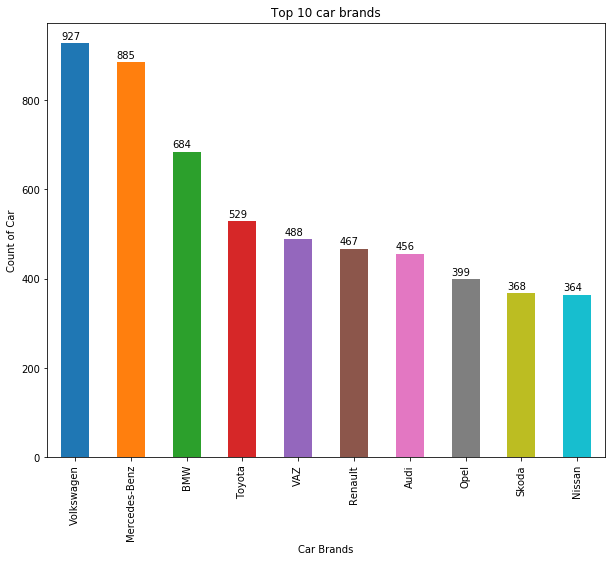

In [139]:
cx = car_df['car'].value_counts().head(10).plot(kind='bar',title='Top 10 car brands')
cx.set_xlabel("Car Brands")
cx.set_ylabel("Count of Car")
for i in cx.patches:
    cx.text(i.get_x(),i.get_height()+9,str(i.get_height()))
mat.rcParams['figure.figsize'] = [10.0, 8.0]

### 4.2  What is the market share of car brands in this market based on volume and revenue?  <a id='section402'></a>

In [56]:
def mark_others(x):
    if x['car'] in car_df['car'].value_counts().head():
        return x['car']
    else:
        return 'Other'

oth_car = car_df.apply(mark_others,axis=1)

In [57]:
car_price = car_df.groupby(['car'])['price'].apply(lambda x: '%.2f' % x.sum()).reset_index()
car_price['price'] = pd.to_numeric(car_price['price'])
car_price['car'] = car_price.apply(mark_others,axis=1)
car_price = car_price.groupby(['car'])['price'].apply(lambda x: '%.2f' % x.sum()).reset_index()

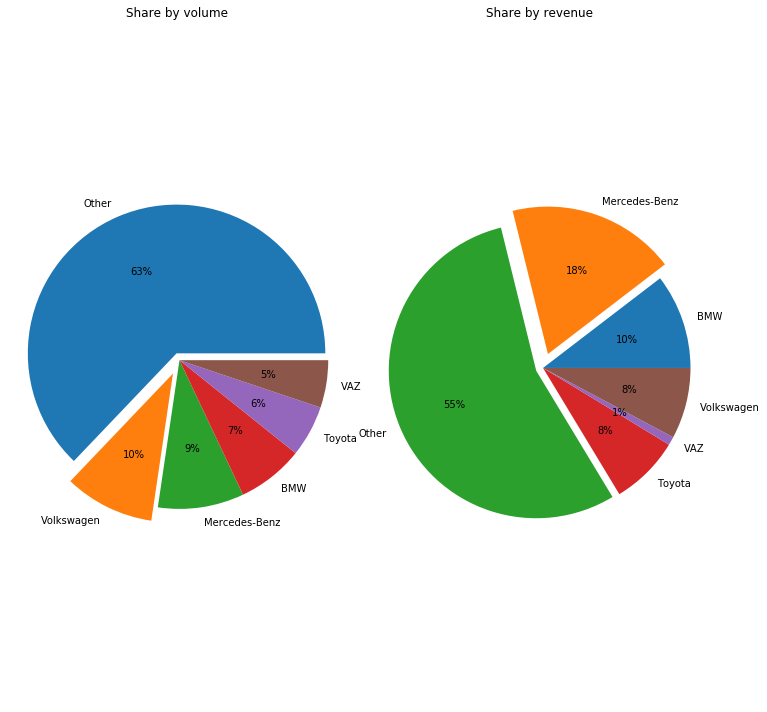

In [143]:
from matplotlib.gridspec import GridSpec
the_grid = GridSpec(1, 2)
plt.subplot(the_grid[0, 0], aspect=1)
plt.pie(oth_car.value_counts().values, labels=oth_car.value_counts().index,autopct='%1.0f%%',explode=[0.05,0.1,0,0,0,0])
plt.title('Share by volume')
plt.axis('equal')
plt.tight_layout()
plt.subplot(the_grid[0, 1], aspect=1)
plt.pie(car_price['price'], labels=car_price['car'],autopct='%1.0f%%',explode=[0,0.1,0.05,0,0,0])
plt.title('Share by revenue')
plt.axis('equal')

mat.rcParams['figure.figsize'] = [9.0, 9.0]
plt.show()

### 4.3  Which are the top 5 most available/sold car models in this market?  <a id='section403'></a>

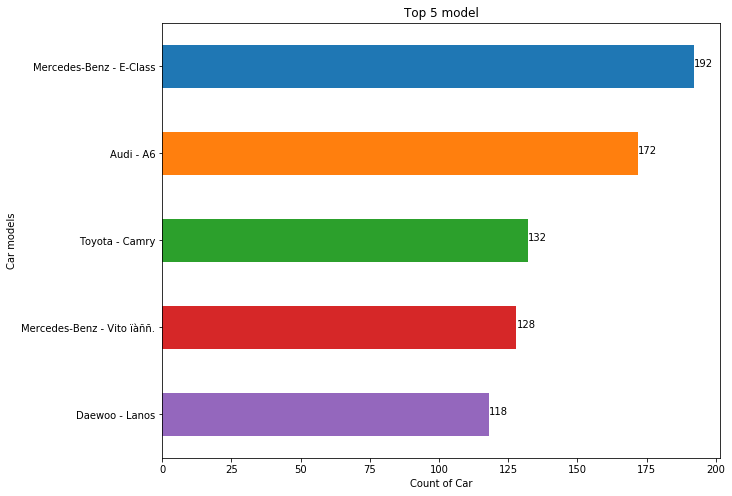

In [59]:
tcar = car_df[['car','model']][['car','model']]
tcar['model'] = tcar['car'] + ' - ' + tcar['model']
cx = tcar.model.value_counts().head().plot(kind='barh',title='Top 5 model')
cx.set_ylabel("Car models")
cx.set_xlabel("Count of Car")
for i in cx.patches:
    cx.text(i.get_width(),i.get_y()+0.25,str(i.get_width()))
cx.invert_yaxis()
mat.rcParams['figure.figsize'] = [8.0, 6.0]

### 4.4 Out of the top 5 brand of cars, Which are the top 5 models most available/sold in this market?  <a id='section404'></a>

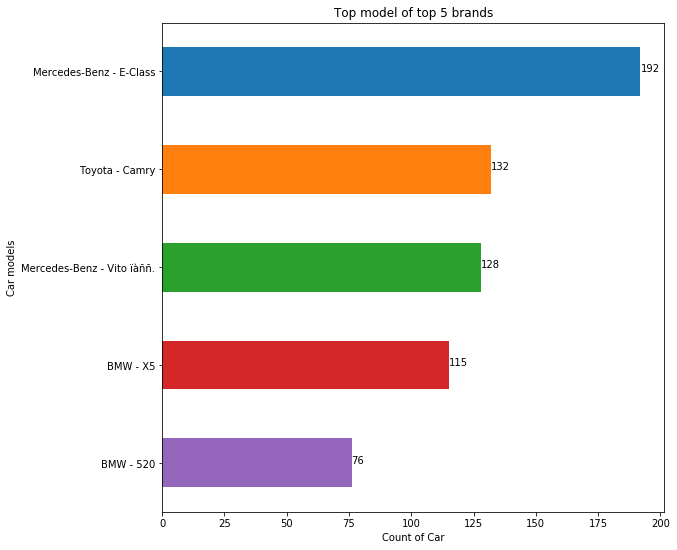

In [144]:
tcar = car_df[car_df['car'].isin(car_df['car'].value_counts().head().index.values)][['car','model']]
tcar['model'] = tcar['car'] + ' - ' + tcar['model']
cx = tcar.model.value_counts().head().plot(kind='barh',title='Top model of top 5 brands')
cx.set_ylabel("Car models")
cx.set_xlabel("Count of Car")
for i in cx.patches:
    cx.text(i.get_width(),i.get_y()+0.25,str(i.get_width()))
cx.invert_yaxis()
mat.rcParams['figure.figsize'] = [9.0, 7.0]

### 4.5 Volkswagen is the top car, why does'nt any of its models list in the top 5 models ?  <a id='section405'></a>

In [61]:
tcar = car_df.groupby(['car','model']).count().reset_index()
tcar.set_index('car')
print('There are {} different models of Volkswagen cars.'.format(tcar.loc[tcar['car']=='Volkswagen'].model.count()))
print('\nThe top 5 models of Volkswagen car are :\n\n',car_df[car_df['car']=='Volkswagen'][['car','model']].model.value_counts().head())
print('\nHence, even though Volkswagen is the Top car in terms of brand, none of its models list in Top5')

There are 50 different models of Volkswagen cars.

The top 5 models of Volkswagen car are :

 Passat B6                 66
Touareg                   66
Caddy ãðóç.               63
T5 (Transporter) ïàññ.    61
Polo                      60
Name: model, dtype: int64

Hence, even though Volkswagen is the Top car in terms of brand, none of its models list in Top5


### 4.6 Which cars are very rarely available/sold in this market ?  <a id='section406'></a>

In [62]:
car_df.car.value_counts().tail(20)

Rolls-Royce    2
Bogdan         2
Other-Retro    1
Barkas         1
Saab           1
Samsung        1
Changan        1
Aro            1
Maserati       1
Lamborghini    1
FAW            1
ZX             1
Buick          1
Huanghai       1
Wartburg       1
Fisker         1
SMA            1
TATA           1
Hafei          1
Mercury        1
Name: car, dtype: int64

### 4.7 Which are the top 5 most expensive car models available/sold in this market ?  <a id='section407'></a>

In [63]:
car_df.sort_values(by=['price'],ascending=False)[['car','price']].head().reset_index()

,index,car,price
0,7621,Bentley,547800.0
1,1611,Bentley,499999.0
2,2637,Bentley,474999.0
3,4134,Bentley,449999.0
4,4325,Mercedes-Benz,300000.0


### 4.8 Which are the top 5 most cheap car models available/sold in this market ?  <a id='section408'></a>

In [64]:
car_df.sort_values(by=['price'],ascending=False)[['car','price']].tail().reset_index()

,index,car,price
0,4905,VAZ,389.025
1,8252,ZAZ,370.500
2,7566,Moskvich-AZLK,350.000
3,6457,Moskvich-AZLK,280.000
4,5010,GAZ,259.350


### 4.9 Which are the most and least available/sold/preferred car body type in this market ?  <a id='section409'></a>

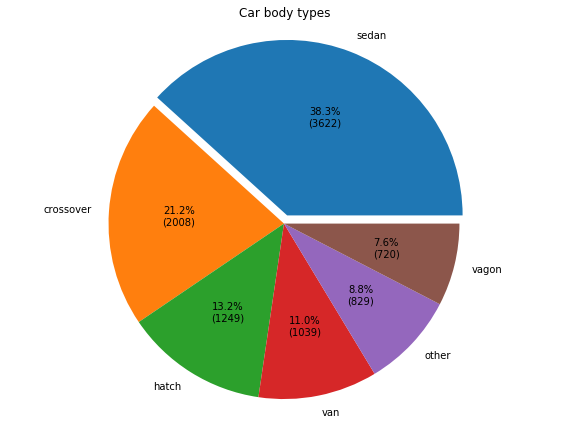

The most preferred body type is sedan and the least preferred body type is vagon.


In [65]:
def get_val(x, allvals):
    total = int(np.ceil(x/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(x,total)

plt.pie(car_df['body'].value_counts().values, labels=car_df['body'].value_counts().index, autopct=lambda x: get_val(x, car_df['body'].value_counts().values),explode=[0.05,0,0,0,0,0])
plt.axis('equal')
plt.title('Car body types')
plt.tight_layout()
mat.rcParams['figure.figsize'] = [8.0, 6.0]
plt.show()
print('The most preferred body type is {0} and the least preferred body type is {1}.'.format('sedan','vagon'))

### 4.10 Which are the most and least available/sold/preferred car engine type in this market ?  <a id='section410'></a>

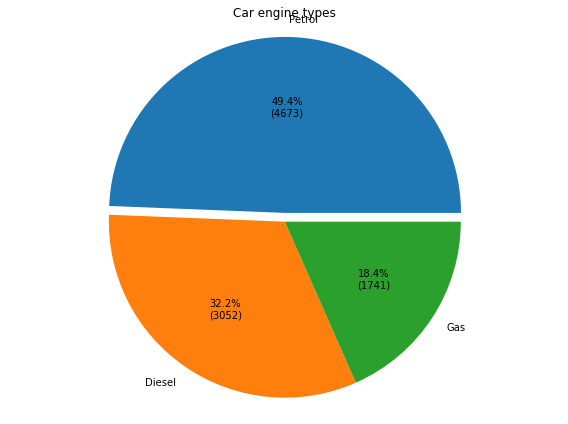

In [66]:
plt.pie(car_df['engType'].value_counts().values, labels=car_df['engType'].value_counts().index, autopct=lambda x: get_val(x, car_df['engType'].value_counts().values),explode=[0.05,0,0,])
plt.axis('equal')
plt.title('Car engine types')
plt.tight_layout()
mat.rcParams['figure.figsize'] = [8.0, 6.0]
plt.show()

### 4.11 How is the car engine type distributed in each body type ?  <a id='section411'></a>

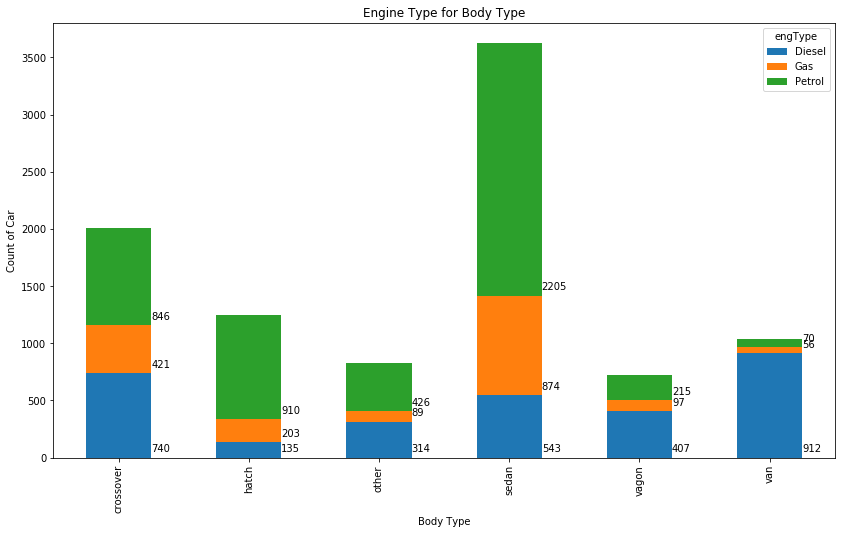

In [152]:
relation = pd.crosstab( car_df.body, car_df.engType )
#cx = relation.plot(kind="bar", stacked=True)
#cx = plt.xlabel('Body Type')
cx = relation.plot(kind='bar',stacked=True,title='Engine Type for Body Type')
cx.set_xlabel("Body Type")
cx.set_ylabel("Count of Car")
mat.rcParams['figure.figsize'] = [12.0, 8.0]
for i in cx.patches:
    cx.text(i.get_x()+0.5,i.get_y()+50,str(i.get_height()))

### 4.12 engine type and engV vs price, which kind of engine is more expensive ?  <a id='section412'></a>

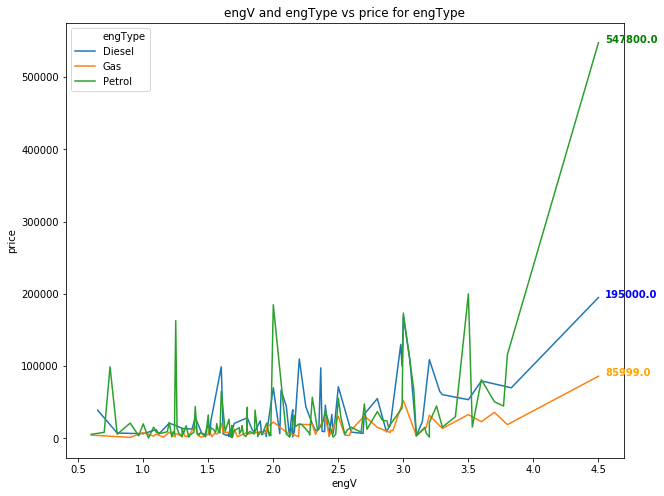

In [68]:
relation = car_df.groupby(['engType','engV'])['price'].apply(lambda x: x.max()).reset_index()
cx = sns.lineplot(data=relation, y='price', x='engV', hue='engType')
plt.title("engV and engType vs price for engType")
cx.text(4.55, car_df[car_df['engType']=='Petrol'].price.max(), car_df[car_df['engType']=='Petrol'].price.max(), horizontalalignment='left', size='medium', color='green', weight='semibold')
cx.text(4.55, car_df[car_df['engType']=='Diesel'].price.max(), car_df[car_df['engType']=='Diesel'].price.max(), horizontalalignment='left', size='medium', color='blue', weight='semibold')
cx.text(4.55, car_df[car_df['engType']=='Gas'].price.max(), car_df[car_df['engType']=='Gas'].price.max(), horizontalalignment='left', size='medium', color='orange', weight='semibold')
plt.show()

### 4.13 engine type and engV vs mileage, which kind of engine has best mileage ?  <a id='section413'></a>

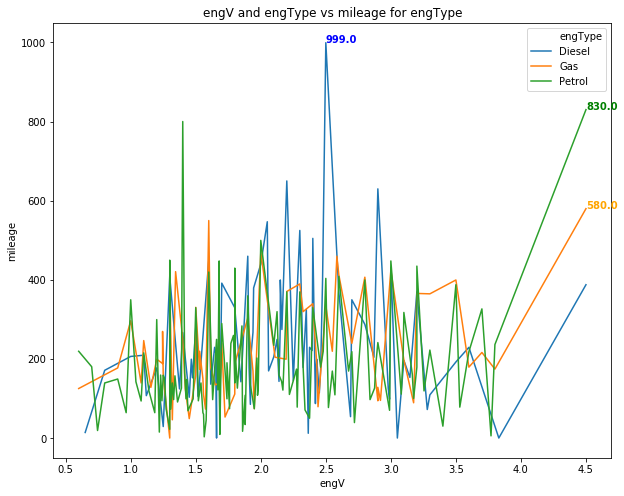

In [69]:
relation = car_df.groupby(['engType','engV'])['mileage'].apply(lambda x: x.max()).reset_index()
cx = sns.lineplot(data=relation, y='mileage', x='engV', hue='engType')
plt.title("engV and engType vs mileage for engType")
cx.text(car_df[(car_df['engType']=='Petrol') & (car_df['mileage']==car_df[car_df['engType']=='Petrol'].mileage.max())]['engV'].max(), car_df[car_df['engType']=='Petrol'].mileage.max(), car_df[car_df['engType']=='Petrol'].mileage.max().round(0), horizontalalignment='left', size='medium', color='green', weight='semibold')
cx.text(car_df[(car_df['engType']=='Diesel') & (car_df['mileage']==car_df[car_df['engType']=='Diesel'].mileage.max())]['engV'].max(), car_df[car_df['engType']=='Diesel'].mileage.max(), car_df[car_df['engType']=='Diesel'].mileage.max().round(0), horizontalalignment='left', size='medium', color='blue', weight='semibold')
cx.text(car_df[(car_df['engType']=='Gas') & (car_df['mileage']==car_df[car_df['engType']=='Gas'].mileage.max())]['engV'].max(), car_df[car_df['engType']=='Gas'].mileage.max(), car_df[car_df['engType']=='Gas'].mileage.max().round(0), horizontalalignment='left', size='medium', color='orange', weight='semibold')
plt.show()

### 4.14 body vs mileage, which kind of body has best mileage ?  <a id='section414'></a>

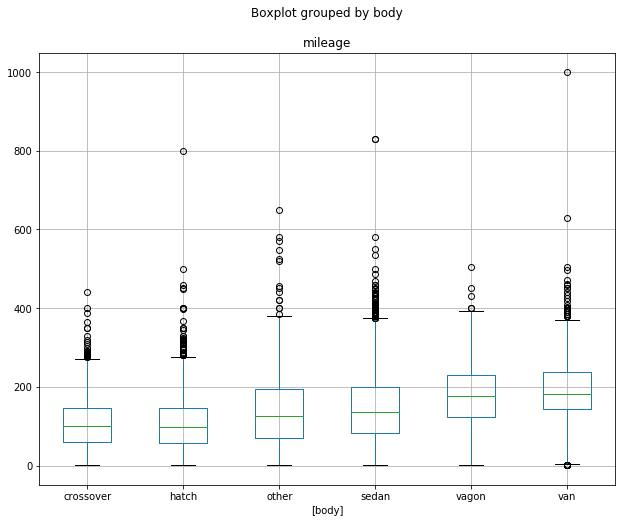

In [70]:
car_df[['body','mileage']].boxplot(by='body')

The group box as shown above indicate, there are outliers.<br/>
The higher mileage could be because of the fuel tank capacity. Ignoring the mean and going by the median.<br/>
The mileage in the data set appear to be number of kms covered rather than the classic kms/litre.<br/>
The vagon and van have the highest mileage and crossover and hatch has the lowest mileage.

### 4.15 Which year cars are most available/sold and what is their registration status ?  <a id='section415'></a>

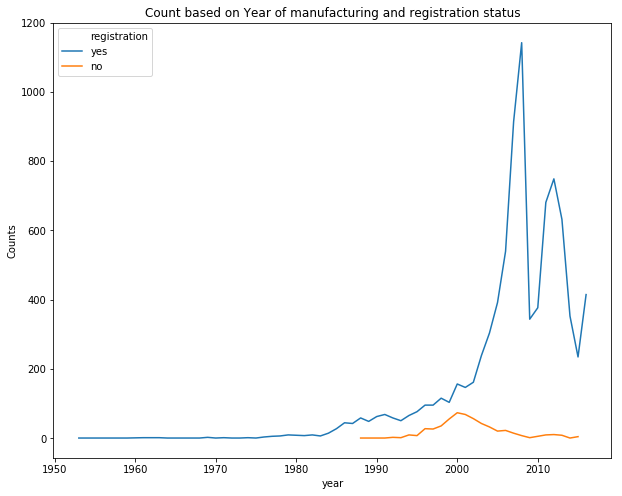

In [84]:
yr_reg = car_df.groupby('year')['registration'].value_counts().sort_values(ascending=False)
yr_reg = pd.DataFrame(yr_reg)
yr_reg.rename(columns={'registration': 'Counts'}, inplace=True)
yr_reg.reset_index(inplace=True)
sns.lineplot(data=yr_reg, x='year', y='Counts', hue='registration')
plt.title("Count based on Year of manufacturing and registration status")
plt.show()

### 4.16 What is the price range of cars based on the year of manufacturing and drive type?  <a id='section416'></a>

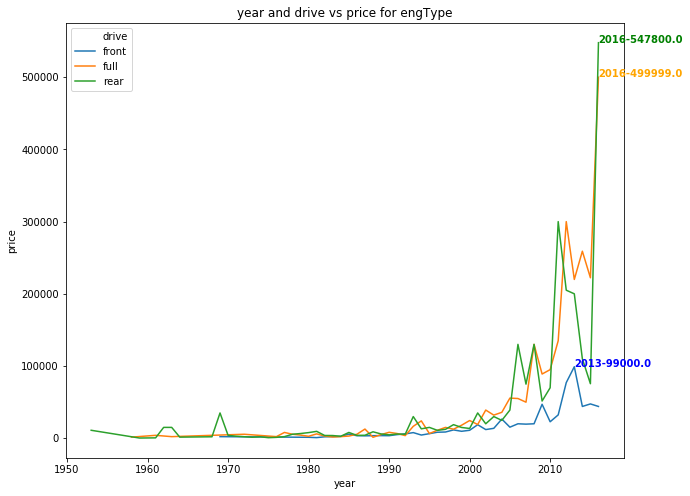

In [105]:
relation = car_df.groupby(['drive','year'])['price'].apply(lambda x: x.max()).reset_index()
cx = sns.lineplot(data=relation, y='price', x='year', hue='drive')
plt.title("year and drive vs price for engType")
rear = car_df[car_df['drive']=='rear'].price.max().round(0)
full = car_df[car_df['drive']=='full'].price.max().round(0)
front = car_df[car_df['drive']=='front'].price.max().round(0)
r_yr = car_df[(car_df['drive']=='rear') & (car_df['price']==car_df[car_df['drive']=='rear'].price.max())]['year'].max()
fr_yr = car_df[(car_df['drive']=='front') & (car_df['price']==car_df[car_df['drive']=='front'].price.max())]['year'].max()
fu_yr = car_df[(car_df['drive']=='full') & (car_df['price']==car_df[car_df['drive']=='full'].price.max())]['year'].max()


cx.text(r_yr,rear,str(r_yr) + '-' + str(rear), horizontalalignment='left', size='medium', color='green', weight='semibold')
cx.text(fu_yr,full, str(fu_yr) + '-' + str(full), horizontalalignment='left', size='medium', color='orange', weight='semibold')
cx.text(fr_yr,front,str(fr_yr) + '-' + str(front), horizontalalignment='left', size='medium', color='blue', weight='semibold')
plt.show()


### 4.17 How are engine types distributed based on engine volume?  <a id='section417'></a>

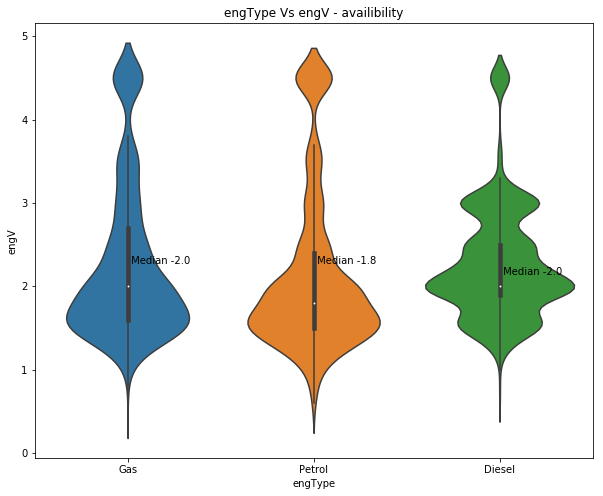

In [135]:
cx = sns.violinplot('engType','engV', kind='point', data = car_df)
plt.title('engType Vs engV - availibility')

gas_mo = car_df[car_df['engType']=='Gas'].engV.median()
petrol_mo = car_df[car_df['engType']=='Petrol'].engV.median()
diesel_mo = car_df[car_df['engType']=='Diesel'].engV.median()

yposlist = car_df.groupby(['engType'])['engV'].mean().tolist()
xposlist = range(len(yposlist))
stringlist = [str(' Median -') + str(gas_mo),str(' Median -') + str(petrol_mo),str(' Median -') + str(diesel_mo)]

for i in range(len(stringlist)):
    cx.text(xposlist[i], yposlist[i], stringlist[i])
plt.show()

### 4.18 Establish correlation between all the features using heatmap.  <a id='section418'></a>

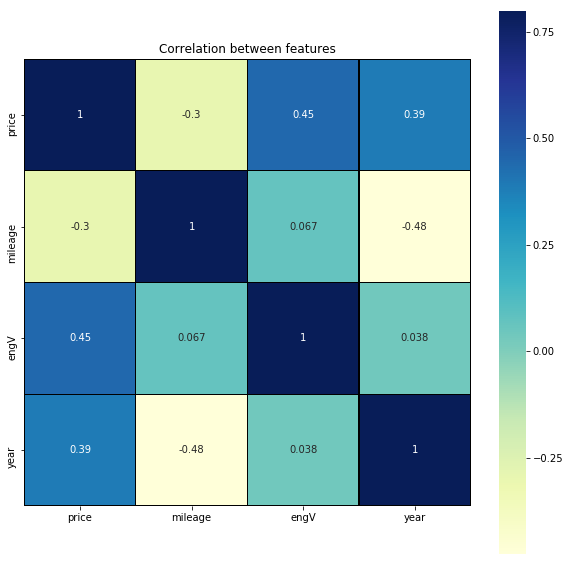

In [138]:
corr = car_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')
plt.show()

Some of the observations made in previous sections can be rechecked and the strength of the relationship is also available with the heat map. <br/>
The following observations can be made from the heat may:
* Newer models are priced higher. 
* As the engine volume/power goes up, price goes up.
* As the mileage goes up, price goes down. This negative correlation could be because of the fact that vans and vogons have bigger fuel tank and better mileage, but they are priced lower compared to the luxurious/sporty cars with lower mileage.
* mileage and engV have a week correlation, in this case; if the engV goes up, it may not mean the mileage will go down drastically. Longer distance can still be covered with bigger fuel tank.
* Engine volume has stayed flat over the years. In the era where the awareness about fuel consumption is increasing, negative correlation can be expected in future.
* Older cars have lower mileage. 

## 5. Conclusion/Summary  <a id='section5'></a>

The observations from the EDA can be summarized as below:
*	In this market there are totally __87__ varieties __car brands__ available/sold. __Volkswagen__ cars are the --__highest__ available/sold car brand in terms of __volume__ with __10% market share__ and __Mercedes-Benz__ is the __top brand__ in terms of revenue/inventory cost with __18% market share__. There are about __18__ car brands which are __very rare__ in the market with only 1 unit available/sold.
*	There are totally __888__ car models available, Mercedes-Benz __E-Class__ with __192__ units is __highest__ available/sold model based on volume. even though Volkswagen is the Top car in terms of brand volume, none of its models list in Top 5 models. This is because Volkswagen has __50__ different models.
*	__Bentley__ Cars are most expensive priced at __547800.0 USD__ and __Gaz__ cars are the cheapest price at __259.350 USD__. 
*	There are __6__ different body types available. __Sedan__ body types are most preferred/available/sold with 3622 units, which is __38% market share__. __Vagon__ body types are least preferred/available/sold with 720 units which is 7.6% market share.
*	__Petrol engine__ types are most preferred/available/sold with 4673 units, which is __49%__ market share. __Gas__ engine types are least preferred/available/sold with 1741 units which is __18.4%__ market share.
*	__Vagon and Van__ body types mostly have __Diesel engines__, Petrol engines dominate in all other body types.
*	There are 3 different transmission available they are __full wheel, rear wheel and front wheel drive__. The rear wheel drive cars are most __expensive__ and the front wheel drive cars are the __cheapest__. 
*	__Petrol__ cars are most __expensive__ and as the engine volume /power goes up the price goes up.
*	__Diesel__ engines have the __highest mileage__ and the mileage is highest when the engine volume is 2500 Cubic Cm.
*	The mileage in the data set appear to be number of Kms covered rather than the classic Kms/litre. The vagon and van have the __highest mileage__ and crossover and hatch has the __lowest mileage__.
*	Cars with year of manufacturing from __1953 to 2016__ are available/sold. __2008 model__ cars are most available/sold cars. There are about __561__ cars which are __unregistered__. 
*	__Newest__ cars are __most expensive__ and __older__ cars are __least expensive__. The price is almost __flat__ if the car is older than 2000 model.
*	Most cars are with the engine volume close to __2000 CC__.
*	As the __mileage__ goes up, __price__ goes down. This __negative correlation__ could be because vans and vogons may have bigger fuel tank and hence better mileage, but they are priced lower compared to the luxurious/sporty cars with lower mileage.
*	__mileage and engV__ have a __week correlation__, in this case; if the engV goes up, it may not mean the mileage will go down drastically. Longer distance can still be covered with bigger fuel tank.
*	Engine volume has stayed flat over the years. In the era where the awareness about fuel consumption is increasing, negative correlation can be expected in future.
*	Older cars have lower mileage.